In [2]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SRCdata = "pump_station_data"

#loading Dataframe from parquet file
df = pd.read_parquet(f'data/{SRCdata}.parquet', engine='pyarrow')
#setting time column as datetime object
#df["time"] = pd.to_datetime(df["time"])  
#print(df["pump4_rpm"][1:3])

# filter only pump4 with in steady state and pump1 is off
#df_fil = df[(df["pump4_rpm"] > 800) & (df["pump1_rpm"] == 0)]
df_fil = df[(df["pump4_rpm"] > -1) & (df["pump1_rpm"] == 0)]


KeyboardInterrupt: 

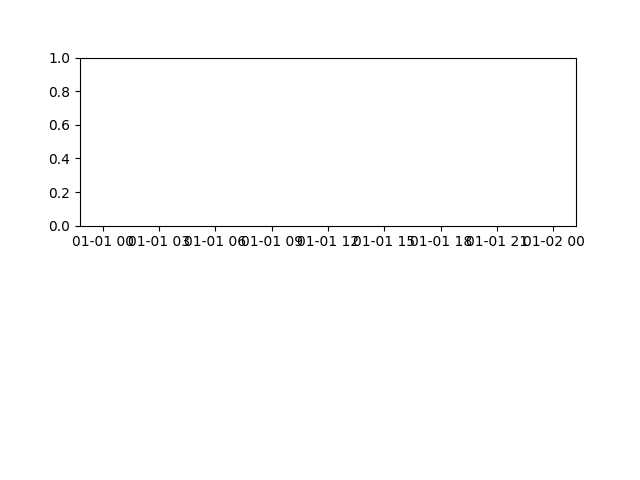

In [3]:
plt.figure()
plt.ion()
ax1 = plt.subplot(2,1,1)
#plt.plot(df_fil["pump4_rpm"]) 
plt.plot(df["pump4_power"])  
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.plot(df["pump4_rpm"])  
plt.show()



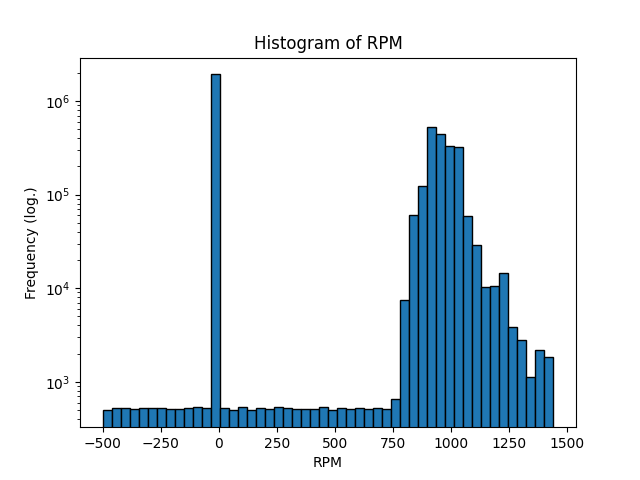

In [6]:
plt.figure()
ax = plt.subplot()
plt.hist(df["pump4_rpm"], bins=50, edgecolor='black')
plt.xlabel('RPM')
plt.ylabel('Frequency (log.)')
plt.title('Histogram of RPM')
ax.set_yscale('log')
plt.show()


# Save filtered data
df_fil.to_pickle(f"data/{SRCdata}_filtered_0RPM.pkl")